<a href="https://colab.research.google.com/github/chhhhr/Medical-insurance-fraud-Intelligent-monitoring-research/blob/main/1_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 导入库和原始数据

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams["font.family"] = "Microsoft YaHei"

origin_data = pd.read_csv('data.csv')
features = origin_data.columns

## 查看原始数据

In [ ]:
origin_data.describe()

,个人编码,一天去两家医院的天数,就诊的月数,月就诊天数_MAX,月就诊天数_AVG,月就诊医院数_MAX,月就诊医院数_AVG,就诊次数_SUM,月就诊次数_MAX,月就诊次数_AVG,月统筹金额_MAX,月统筹金额_AVG,月药品金额_MAX,月药品金额_AVG,医院_就诊天数_MAX,医院_就诊天数_AVG,医院_统筹金_MAX,医院_统筹金_AVG,医院_药品_MAX,医院_药品_AVG,医院编码_NN,顺序号_NN,交易时间DD_NN,交易时间YYYY_NN,交易时间YYYYMM_NN,住院天数_SUM,个人账户金额_SUM,统筹支付金额_SUM,ALL_SUM,可用账户报销金额_SUM,药品费发生金额_SUM,药品费自费金额_SUM,药品费申报金额_SUM,贵重药品发生金额_SUM,中成药费发生金额_SUM,中草药费发生金额_SUM,检查费发生金额_SUM,检查费自费金额_SUM,检查费申报金额_SUM,贵重检查费金额_SUM,治疗费发生金额_SUM,治疗费自费金额_SUM,治疗费申报金额_SUM,手术费发生金额_SUM,手术费自费金额_SUM,手术费申报金额_SUM,床位费发生金额_SUM,床位费申报金额_SUM,医用材料发生金额_SUM,高价材料发生金额_SUM,医用材料费自费金额_SUM,成分输血申报金额_SUM,其它发生金额_SUM,其它申报金额_SUM,一次性医用材料申报金额_SUM,起付线标准金额_MAX,起付标准以上自负比例金额_SUM,医疗救助个人按比例负担金额_SUM,最高限额以上金额_SUM,基本统筹基金支付金额_SUM,公务员医疗补助基金支付金额_SUM,城乡救助补助金额_SUM,基本个人账户支付_SUM,非账户支付金额_SUM,本次审批金额_SUM,补助审批金额_SUM,医疗救助医院申请_SUM,残疾军人补助_SUM,民政救助补助_SUM,城乡优抚补助_SUM,出院诊断病种名称_NN,出院诊断LENTH_MAX,药品在总金额中的占比,个人支付的药品占比,检查总费用在总金额占比,个人支付检查费用占比,治疗费用在总金额占比,个人支付治疗费用占比,BZ_民政救助,BZ_城乡优抚,是否挂号,RES
count,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.0,16000.000000,16000.0,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15645.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,3.520000e+14,1.883875,5.817812,7.824438,5.854813,2.099000,1.735954,36.818438,8.419250,6.264291,3943.185445,2783.040791,3631.380422,2602.861947,26.638500,19.079701,12602.672037,9056.441440,11696.530186,8257.661369,2.197500,91.459750,34.419375,1.0,5.817812,0.0,2318.743704,16248.157033,18581.903839,2200.475267,15275.711085,80.603902,15023.718634,2709.672334,3401.571010,2389.157068,598.063251,10.267001,580.508156,60.580062,2385.897406,8.733015,2348.499072,7.891188,0.090000,7.800469,5.195688,5.150125,301.377911,17.197364,10.763950,10.078250,7.767312,0.048625,263.894079,7.405927,2315.785588,101.078898,0.079136,15440.051715,51.805779,377.007672,126.748913,2191.994791,18236.173922,572.439964,404.379674,3.618437,374.437024,1.236406,5.343438,26.032279,0.854763,0.005500,0.039006,0.005560,0.081316,0.010609,0.143125,0.000562,0.253250,0.049563
std,0.000000e+00,5.227365,0.702069,4.193234,3.377273,0.947038,0.724497,23.656539,5.199283,3.940291,2936.217833,1857.794225,2682.941527,1776.066792,17.587198,14.173003,9507.692019,8318.767632,8555.770743,6948.782110,1.048302,64.978792,20.400236,0.0,0.702069,0.0,2427.725593,10696.643485,13507.065808,2369.065418,10536.443992,215.586310,10240.500007,6256.166307,3818.560983,3333.948935,908.926822,88.452731,855.831610,308.040347,7070.959992,94.206063,6940.260261,162.875183,5.830707,162.763860,30.771234,30.710988,520.176901,427.518396,100.977949,443.899162,29.998053,3.263327,474.467387,111.156022,2253.697641,1140.931780,10.010032,9016.969096,514.786578,1670.137464,204.646380,2415.539590,13107.096667,2295.805737,4563.731157,212.888960,1660.898502,78.017209,2.889941,12.353055,0.168843,0.013990,0.064466,0.032765,0.155653,0.056906,0.350211,0.023711,0.434886,0.217046
min,3.520000e+14,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.0,1.450000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   个人编码               16000 non-null  float64
 1   一天去两家医院的天数         16000 non-null  int64  
 2   就诊的月数              16000 non-null  int64  
 3   月就诊天数_MAX          16000 non-null  int64  
 4   月就诊天数_AVG          16000 non-null  float64
 5   月就诊医院数_MAX         16000 non-null  int64  
 6   月就诊医院数_AVG         16000 non-null  float64
 7   就诊次数_SUM           16000 non-null  int64  
 8   月就诊次数_MAX          16000 non-null  int64  
 9   月就诊次数_AVG          16000 non-null  float64
 10  月统筹金额_MAX          16000 non-null  float64
 11  月统筹金额_AVG          16000 non-null  float64
 12  月药品金额_MAX          16000 non-null  float64
 13  月药品金额_AVG          16000 non-null  float64
 14  医院_就诊天数_MAX        16000 non-null  int64  
 15  医院_就诊天数_AVG        16000 non-null  float64
 16  医院_统筹金_MAX         160

In [ ]:
origin_data.head(10)

,个人编码,一天去两家医院的天数,就诊的月数,月就诊天数_MAX,月就诊天数_AVG,月就诊医院数_MAX,月就诊医院数_AVG,就诊次数_SUM,月就诊次数_MAX,月就诊次数_AVG,月统筹金额_MAX,月统筹金额_AVG,月药品金额_MAX,月药品金额_AVG,医院_就诊天数_MAX,医院_就诊天数_AVG,医院_统筹金_MAX,医院_统筹金_AVG,医院_药品_MAX,医院_药品_AVG,医院编码_NN,顺序号_NN,交易时间DD_NN,交易时间YYYY_NN,交易时间YYYYMM_NN,住院天数_SUM,个人账户金额_SUM,统筹支付金额_SUM,ALL_SUM,可用账户报销金额_SUM,药品费发生金额_SUM,药品费自费金额_SUM,药品费申报金额_SUM,贵重药品发生金额_SUM,中成药费发生金额_SUM,中草药费发生金额_SUM,检查费发生金额_SUM,检查费自费金额_SUM,检查费申报金额_SUM,贵重检查费金额_SUM,治疗费发生金额_SUM,治疗费自费金额_SUM,治疗费申报金额_SUM,手术费发生金额_SUM,手术费自费金额_SUM,手术费申报金额_SUM,床位费发生金额_SUM,床位费申报金额_SUM,医用材料发生金额_SUM,高价材料发生金额_SUM,医用材料费自费金额_SUM,成分输血申报金额_SUM,其它发生金额_SUM,其它申报金额_SUM,一次性医用材料申报金额_SUM,起付线标准金额_MAX,起付标准以上自负比例金额_SUM,医疗救助个人按比例负担金额_SUM,最高限额以上金额_SUM,基本统筹基金支付金额_SUM,公务员医疗补助基金支付金额_SUM,城乡救助补助金额_SUM,基本个人账户支付_SUM,非账户支付金额_SUM,本次审批金额_SUM,补助审批金额_SUM,医疗救助医院申请_SUM,残疾军人补助_SUM,民政救助补助_SUM,城乡优抚补助_SUM,出院诊断病种名称_NN,出院诊断LENTH_MAX,药品在总金额中的占比,个人支付的药品占比,检查总费用在总金额占比,个人支付检查费用占比,治疗费用在总金额占比,个人支付治疗费用占比,BZ_民政救助,BZ_城乡优抚,是否挂号,RES
0,3.520000e+14,0,6,7,5.666667,3,2.166667,34,7,5.666667,3501.18,2541.293333,3901.45,2695.291667,20,11.333333,7553.00,5082.586667,8522.57,5390.583333,3,69,34,1,6,0,1970.99,15247.76,17218.75,1868.06,16171.75,68.93,15929.04,1984.60,4776.49,0.00,875.0,0.0,875.0,0,128.0,0.0,128.0,0,0,0.0,0.0,0.0,10.00,0.0,0.0,0,34.0,0,10.00,0.0,1694.28,0.0,0.0,15247.76,0.0,0.00,228.80,1742.19,16942.04,0.00,0.0,0.0,0.00,0.0,4,29.0,0.939194,0.004262,0.050817,0.0,0.007434,0.000000,0,0,1,0
1,3.520000e+14,0,6,4,2.500000,2,1.333333,15,4,2.500000,2217.66,1637.358333,2449.13,1783.153333,13,7.500000,9500.07,4912.075000,10309.64,5349.460000,2,64,15,1,6,0,1371.57,9824.15,11195.72,1339.67,10698.92,31.90,10418.95,2264.73,1132.45,0.00,345.0,0.0,345.0,0,150.0,0.0,150.0,0,0,0.0,0.0,0.0,1.80,0.0,0.0,0,0.0,0,1.80,0.0,1091.60,0.0,0.0,9824.15,0.0,0.00,199.50,1172.07,10915.75,0.00,0.0,0.0,0.00,0.0,3,20.0,0.955626,0.002982,0.030815,0.0,0.013398,0.000000,0,0,1,0
2,3.520000e+14,8,6,8,6.166667,3,2.166667,45,9,7.500000,3360.55,2583.053333,3302.06,2368.528333,23,15.000000,9161.73,5166.106667,10760.51,4737.056667,3,102,37,1,6,0,2637.20,15498.32,18135.52,2621.28,14211.17,4.72,13926.88,0.00,3762.15,0.00,0.0,0.0,0.0,0,3538.0,0.0,3538.0,0,0,0.0,75.0,75.0,300.15,0.0,0.0,0,11.2,0,300.15,0.0,2341.71,0.0,0.0,15498.32,0.0,0.00,234.00,2403.20,17840.03,0.00,0.0,0.0,0.00,0.0,4,29.0,0.783610,0.000332,0.000000,0.0,0.195087,0.000000,0,0,0,0
3,3.520000e+14,0,6,6,3.666667,2,1.833333,23,6,3.833333,3030.61,2057.720000,1500.12,1048.730000,17,11.500000,11622.17,6173.160000,5504.60,3146.190000,2,56,22,1,6,0,1373.06,12346.32,13719.38,1371.90,6292.38,1.16,6291.22,0.00,5075.85,0.00,0.0,0.0,0.0,0,7427.0,0.0,7427.0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0,0.00,0.0,1371.90,0.0,0.0,12346.32,0.0,0.00,73.34,1299.72,13718.22,0.00,0.0,0.0,0.00,0.0,5,16.0,0.458649,0.000184,0.000000,0.0,0.541351,0.000000,0,0,0,0
4,3.520000e+14,0,6,5,4.333333,1,1.000000,26,5,4.333333,2332.45,2196.315000,2563.26,2417.923333,26,26.000000,13177.89,13177.890000,14507.54,14507.540000,1,64,26,1,6,0,1569.65,13177.89,14747.54,1565.06,14507.54,4.59,14402.13,2367.68,3678.72,0.00,0.0,0.0,0.0,0,240.0,0.0,240.0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0,0.00,0.0,1464.24,0.0,0.0,13177.89,0.0,0.00,64.00,1505.65,14642.13,0.00,0.0,0.0,0.00,0.0,2,33.0,0.983726,0.000316,0.000000,0.0,0.016274,0.000000,0,0,0,0
5,3.520000e+14,9,6,7,5.833333,4,3.000000,44,9,7.333333,3315.78,2727.961667,3525.46,2832.700000,26,11.000000,11837.15,4091.942500,12093.79,4249.050000,4,118,35,1,6,0,1959.43,16367.77,18327.20,1929.89,16996.20,4.74,16880.27,0.00,3754.24,583.09,409.0,0.0,409.0,0,591.5,0.0,591.5,0,0,0.0,0.0,0.0,330.50,0.0,24.8,0,0.0,0,305.70,0.0,1818.70,0.0,0.0,16367.77,0.0,0.00,144.00,1815.43,18186.47,0.00,0.0,0.0,0.00,0.0,9,30.0,0.927376,0.000279,0.022317,0.0,0.032274,0.000000,0,0,0,0
6,3.520000e+14,0,6,10,8.333333,4,2.833333,51,10,8.500000,4865.30,4142.551667,4301.12,3485.258333,27,12.750000,15678.27,6213.827500,13800.78,5227.887500,4,134,50,1,6,0,980.73,24855.31,24373.99,974.73,20911.55,0.00,20911.55,0.00,3160.12,9765.47,2000.0,0.0,2000.0,127,967.0,0.0,967.0,

## 数据分析

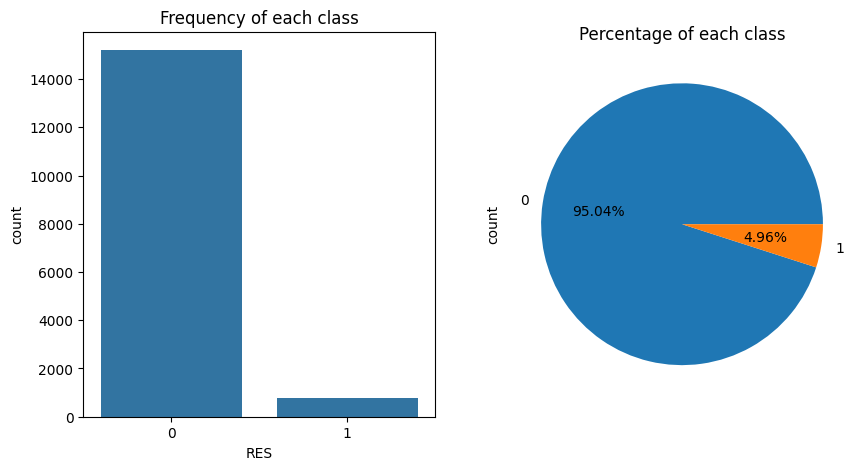

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='RES', data=origin_data, ax=axs[0])
axs[0].set_title('Frequency of each class')
origin_data['RES'].value_counts().plot(x=None, y=None, kind='pie', ax=axs[1], autopct='%1.2f%%')
axs[1].set_title('Percentage of each class')
plt.show()

## 去除部分特征

In [ ]:
data = origin_data.drop(columns=['出院诊断LENTH_MAX','交易时间YYYY_NN','住院天数_SUM'])
features = data.columns
print("Columns num after drop: {}".format(len(data.columns)))

Columns num after drop: 79


## 数据标准化

In [ ]:
#采用z标准归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[[col for col in data.columns if col != 'RES']])
data_standardized = pd.DataFrame(data_standardized, columns=[col for col in data.columns if col != 'RES'])
data_standardized['RES'] = data['RES']
data = data_standardized
data.describe()


,个人编码,一天去两家医院的天数,就诊的月数,月就诊天数_MAX,月就诊天数_AVG,月就诊医院数_MAX,月就诊医院数_AVG,就诊次数_SUM,月就诊次数_MAX,月就诊次数_AVG,月统筹金额_MAX,月统筹金额_AVG,月药品金额_MAX,月药品金额_AVG,医院_就诊天数_MAX,医院_就诊天数_AVG,医院_统筹金_MAX,医院_统筹金_AVG,医院_药品_MAX,医院_药品_AVG,医院编码_NN,顺序号_NN,交易时间DD_NN,交易时间YYYYMM_NN,个人账户金额_SUM,统筹支付金额_SUM,ALL_SUM,可用账户报销金额_SUM,药品费发生金额_SUM,药品费自费金额_SUM,药品费申报金额_SUM,贵重药品发生金额_SUM,中成药费发生金额_SUM,中草药费发生金额_SUM,检查费发生金额_SUM,检查费自费金额_SUM,检查费申报金额_SUM,贵重检查费金额_SUM,治疗费发生金额_SUM,治疗费自费金额_SUM,治疗费申报金额_SUM,手术费发生金额_SUM,手术费自费金额_SUM,手术费申报金额_SUM,床位费发生金额_SUM,床位费申报金额_SUM,医用材料发生金额_SUM,高价材料发生金额_SUM,医用材料费自费金额_SUM,成分输血申报金额_SUM,其它发生金额_SUM,其它申报金额_SUM,一次性医用材料申报金额_SUM,起付线标准金额_MAX,起付标准以上自负比例金额_SUM,医疗救助个人按比例负担金额_SUM,最高限额以上金额_SUM,基本统筹基金支付金额_SUM,公务员医疗补助基金支付金额_SUM,城乡救助补助金额_SUM,基本个人账户支付_SUM,非账户支付金额_SUM,本次审批金额_SUM,补助审批金额_SUM,医疗救助医院申请_SUM,残疾军人补助_SUM,民政救助补助_SUM,城乡优抚补助_SUM,出院诊断病种名称_NN,药品在总金额中的占比,个人支付的药品占比,检查总费用在总金额占比,个人支付检查费用占比,治疗费用在总金额占比,个人支付治疗费用占比,BZ_民政救助,BZ_城乡优抚,是否挂号,RES
count,16000.0,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,16000.000000
mean,0.0,-7.105427e-18,5.719869e-16,-4.085621e-17,-8.348877e-17,-2.344791e-16,-2.522427e-16,-6.927792e-17,1.865175e-17,-8.881784e-19,-1.776357e-17,-6.750156e-17,3.197442e-17,2.131628e-17,-5.329071e-17,-9.237056e-17,7.105427e-17,1.278977e-16,-2.913225e-16,-3.552714e-18,2.131628e-16,1.243450e-17,-1.225686e-16,5.719869e-16,1.421085e-16,-2.202682e-16,1.598721e-16,7.105427e-18,-8.171241e-17,4.973799e-17,8.881784e-18,2.842171e-17,8.526513e-17,-1.154632e-17,-1.421085e-17,-1.065814e-17,4.973799e-17,2.131628e-17,7.105427e-18,-1.421085e-17,0.000000,-6.217249e-18,3.552714e-18,-5.329071e-18,-1.820766e-17,3.685940e-17,-1.865175e-17,-5.329071e-18,-1.065814e-17,1.199041e-17,-4.796163e-17,-3.108624e-18,-3.819167e-17,3.108624e-18,-2.131628e-17,1.065814e-17,1.776357e-18,3.907985e-17,-7.105427e-18,-2.842171e-17,4.263256e-17,1.314504e-16,1.278977e-16,2.131628e-17,-1.421085e-17,-2.220446e-18,5.684342e-17,9.769963e-18,-1.172396e-16,4.263256e-16,-1.687539e-17,-3.685940e-17,6.039613e-17,-4.973799e-17,1.776357e-17,1.421085e-17,5.329071e-18,8.970602e-17,0.049563
std,0.0,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,0.217046
min,0.0,-3.

## 方差筛选

## 模型训练

In [ ]:
#划分数据集
from sklearn.model_selection import train_test_split

data_target = data['RES']
data_features = data[[x for x in data.columns if x != 'RES']]

# 测试集大小20%，训练集大小80%
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=2020)


In [ ]:
# 导入模型
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier()

clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 模型预测

In [ ]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)


## 模型评估

In [ ]:
from sklearn import metrics

# 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict, y_test)
print('The confusion matrix result:\n', confusion_matrix_result)


The confusion matrix result:
 [[3001  100]
 [  27   72]]
